In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [51]:
data= pd.read_csv('SMSSpamCollection',sep='\t',names=['Label','SMS'])
data

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [52]:
data.dtypes

Label    object
SMS      object
dtype: object

In [53]:
data.describe()

,Label,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [54]:
data.isna().sum()

Label    0
SMS      0
dtype: int64

<Axes: xlabel='Label', ylabel='count'>

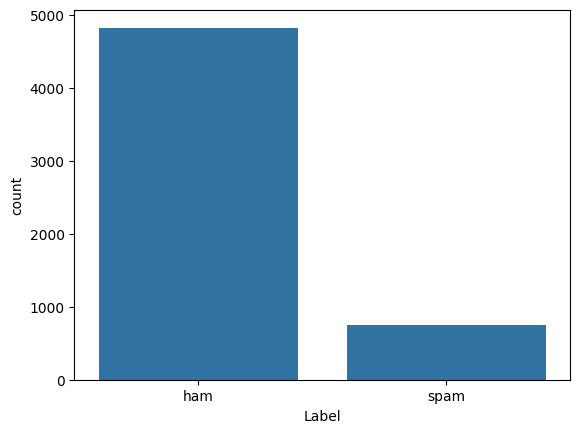

In [55]:
sns.countplot(data=data, x='Label')

In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

In [57]:
data

,Label,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [58]:
data['Label']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Label, Length: 5572, dtype: int32

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
vectorizer = CountVectorizer(strip_accents='ascii',stop_words='english', analyzer='word', token_pattern=r'\b[a-zA-Z]{2,}\b')


In [61]:
vectorizer.get_feature_names_out()

NotFittedError: Vocabulary not fitted or provided

In [62]:
X=vectorizer.fit_transform(data['SMS'])
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 40523 stored elements and shape (5572, 7322)>

In [63]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, data['Label'], test_size=0.2, random_state=42)

In [66]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4457, 7322)
X_test shape: (1115, 7322)
y_train shape: (4457,)
y_test shape: (1115,)


In [67]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [68]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [69]:
y_predic = classifier.predict(X_train)

In [70]:
y_predic

array([1, 0, 0, ..., 0, 0, 0])

In [71]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [72]:
cmatrix = confusion_matrix(y_train, y_predic)
cmatrix

array([[3834,   25],
       [  20,  578]], dtype=int64)

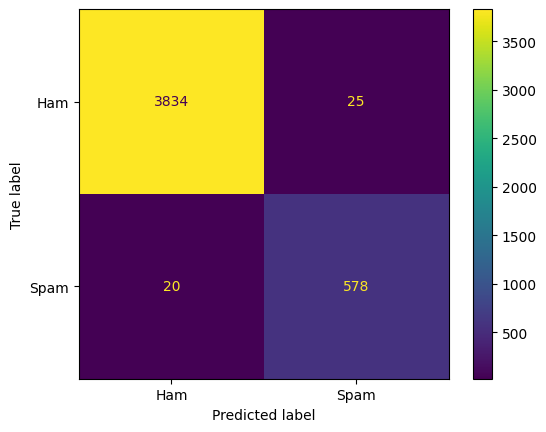

In [73]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=['Ham', 'Spam'])
disp.plot()

In [74]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [75]:
accuracy_score(y_train,y_predic)

0.9899035225487997

In [76]:
f1_score(y_train,y_predic)

0.9625312239800167

In [77]:
precision_score(y_train,y_predic)

0.9585406301824212

In [78]:
recall_score(y_train,y_predic)

0.9665551839464883

In [79]:
y_pred = classifier.predict(X_test)

In [80]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[942,  24],
       [  7, 142]], dtype=int64)

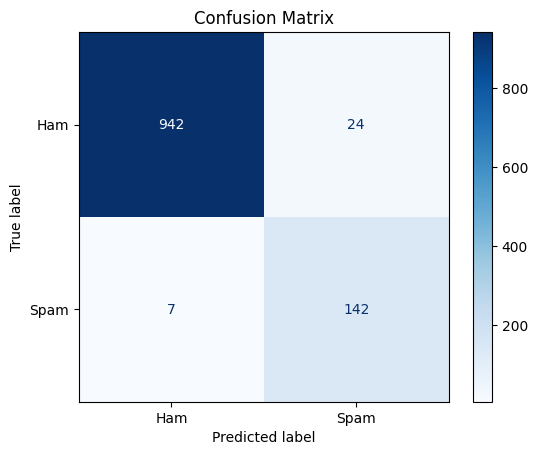

In [82]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [83]:
accuracy_score(y_test,y_pred)

0.9721973094170404

In [84]:
precision_score(y_test, y_pred)


0.8554216867469879

In [85]:
recall_score(y_test, y_pred)

0.9530201342281879

In [86]:
f1_score(y_test, y_pred)

0.9015873015873016

In [87]:
def predict_sms(input_sms):
    input_vectorized = vectorizer.transform([input_sms])
    prediction = classifier.predict(input_vectorized)
    if prediction[0] == 0:
        return "ham"
    else:
        return "spam"

In [88]:
user_input = input("\nEnter an SMS message to check if it's spam or ham: ")
prediction = predict_sms(user_input)
print(f"The message is predicted to be: {prediction}")


Enter an SMS message to check if it's spam or ham:  Free entry in 2 a wkly comp to win FA Cup final


The message is predicted to be: spam


In [89]:
user_input = input("\nEnter an SMS message to check if it's spam or ham: ")
prediction = predict_sms(user_input)
print(f"The message is predicted to be: {prediction}")



Enter an SMS message to check if it's spam or ham:  machine learning practical is held today.


The message is predicted to be: ham
